Exemplo de um Perceptron
Para este exemplo, vamos criar um dataset que simula a não linearidade da operação XOR. Para isto, criaremos quatro grupos distintos de dados.

In [1]:
# Criando o dataset XOR

import numpy as np                          # carrega a biblioteca numpy para operações matriciais

from sklearn.preprocessing import StandardScaler  # importa o método Standard Scaler para a normalização (escalamento) dos dados
from sklearn.utils import shuffle    # metodo shuffle vai embaralhar os pontos gerados

np.random.seed(1000)   # define a seed do random para que o experimento possa ser reproduzido

nb_samples = 1000              #serão criados 1000 pontos
nsb = int(nb_samples / 4)      #divididos em 4 grupos
X = np.zeros((nb_samples, 2))  #onde aqui definimos o tamanho do conjunto X (pontos) - 1000 pontos com 2 dimensões (coordenadas)
Y = np.zeros((nb_samples, ))   #e do Y (classes conjunto roxo = 1 ou conjunto amarelo = 0)

#vamos definir a pequena variação entre os pontos de cada conjunto
#coordenada 1, -1
X[0:nsb, :] = np.random.multivariate_normal([1.0, -1.0], np.diag([0.1, 0.1]), size=nsb)
Y[0:nsb] = 0.0 # classe 0

#coordenada 1, 1
X[nsb:(2 * nsb), :] = np.random.multivariate_normal([1.0, 1.0], np.diag([0.1, 0.1]), size=nsb)
Y[nsb:(2 * nsb)] = 1.0 #classe 1

#coordenada -1, 1
X[(2 * nsb):(3 * nsb), :] = np.random.multivariate_normal([-1.0, 1.0], np.diag([0.1, 0.1]), size=nsb)
Y[(2 * nsb):(3 * nsb)] = 0.0 #classe 0

#coordenada -1, -1
X[(3 * nsb):, :] = np.random.multivariate_normal([-1.0, -1.0], np.diag([0.1, 0.1]), size=nsb)
Y[(3 * nsb):] = 1.0 #classe 1

ss = StandardScaler()
X = ss.fit_transform(X) #normaliza os dados para a escala entre 0,1

X, Y = shuffle(X, Y, random_state=1000) # embaralha os dados

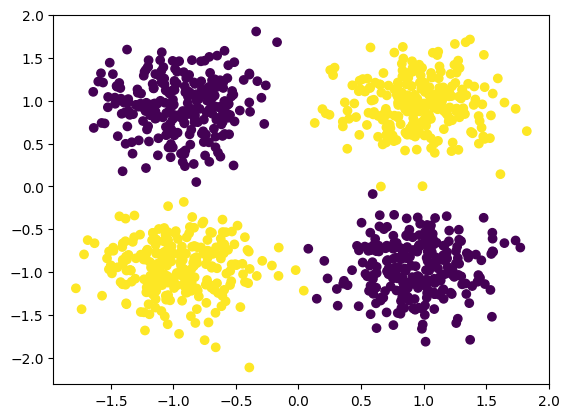

In [2]:
#Exibindo dataset XOR
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

Vamos verificar a acurácia usando um perceptron?

In [3]:
import numpy as np # carrega o numpy

from multiprocessing import cpu_count  #cpu_count define quantos núcles tem o computador - para usar paralelismo durante a execução do algoritmo

from sklearn.linear_model import Perceptron  #importa o modelo perceptron
from sklearn.model_selection import cross_val_score #utiliza o método cross validation para indicar a acurácia média do modelo

pc = Perceptron(penalty='l2', alpha=0.1, max_iter=1000, n_jobs=cpu_count(), random_state=1000) # carrega o perceptron
print(np.mean(cross_val_score(pc, X, Y, cv=10))) # exibe o a acuracia média encontrada pelo modelo

0.5039999999999999


Como o perceptron separa as regiões?

In [4]:
#Funções para plotar a superficie (regiões)
#para demonstrar separação pelo modelo criado

import numpy as np
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.02):
    #define a grade para as coordenadas do gráfico
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    #executa a classificação usando o modelo carregado em clf
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_model(clf):
    fig, ax = plt.subplots()
    # titulo do gráfico
    title = ('Superfície de Decisão')
    # configura as cooredenadas para plotar o gráfico
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    #chama a funcao pra definir os valores do modelo
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_title(title)
    plt.show()

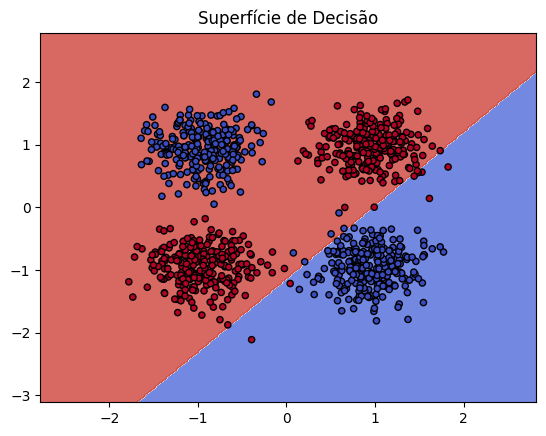

In [5]:
pc.fit(X, Y) # realiza o aprendizado do modelo carregado em pc
plot_model(pc) # as funções acima para executar a classificação e exibir a linha de separaçao dos resultados

MLP - Multilayer Perceptrons

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential() # carrega um modelo feed-forward

model.add(Dense(4, input_dim=2)) #cria uma camada densa com com 4 neuronios e 2 entradas
model.add(Activation('tanh'))   #usando função de ativação tangente hiperbólica

model.add(Dense(2))  #cria uma camada densa com com 2 neuronios (que recebe as saídas da camada anterior)
model.add(Activation('softmax'))   #usando função de ativação softmax para definir qual é a classe na saída

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) # define a rede neural

In [7]:
#vamos separar o conjunto de treinamento e de testes
#30% para testes, o restante para treinamento

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1000) # separa o conjunto de teste com 30% dos dados sorteados aleatóriamente com seed = 1000 
#outros 70% são definidos no conjunto de teste

In [8]:
#treinamento da rede neural 
#usando 100 épocas

#método fit executa o treinamento
model.fit(X_train,  #para o conjunto de teste "train" onde x_train sao os atributos
          to_categorical(Y_train, num_classes=2),  #e y_train sao as classes
          epochs=100,  #em 100 épocas
          batch_size=32, #de 32 em 32
          validation_data=(X_test, to_categorical(Y_test, num_classes=2))) # e demonstrando a acurácia de teste c

Epoch 1/100
22/22 [==============================] - 1s 11ms/step - loss: 0.7471 - accuracy: 0.5129 - val_loss: 0.7526 - val_accuracy: 0.4967
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7282 - accuracy: 0.4914 - val_loss: 0.7345 - val_accuracy: 0.4700
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7139 - accuracy: 0.4686 - val_loss: 0.7205 - val_accuracy: 0.4333
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7041 - accuracy: 0.4443 - val_loss: 0.7121 - val_accuracy: 0.4000
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.4314 - val_loss: 0.7044 - val_accuracy: 0.3967
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.4171 - val_loss: 0.6991 - val_accuracy: 0.3667
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.3829 - val_loss: 0.6941 - val_accuracy: 0.3200
Epoch 8/100


In [9]:
#verificação(predição) usando a base de teste
#qual seria a resposta da rede treinada se ela classificar os pontos que estao no conjunto de testes?

Y_eval_mlp = np.argmax(model.predict(X_test), axis=1) #retorna as classes definidas pelo modelo

10/10 [==============================] - 0s 1ms/step


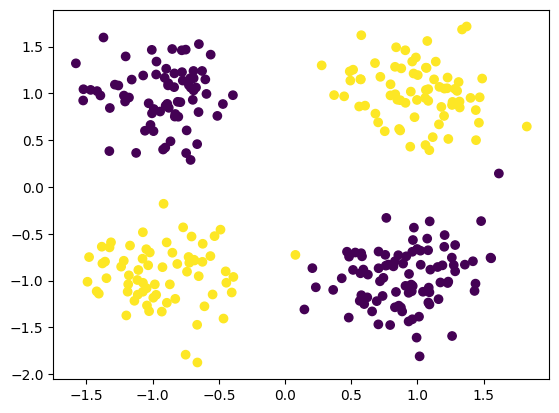

In [10]:
#plotando os resultados
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_eval_mlp) # exibe pontos para coordenadas em X_Test definindo as cores a partir dos dados em Y_eval_mlp
plt.show() #exibe gráfico

In [11]:
#para verificarmos os limites entre os conjuntos de classificação
#vamos criar um conjunto com muitos pontos gerados aleatóriamente
#e usar o modelo para definir qual seria sua classe

import numpy as np

Xm = np.linspace(-2.0, 2.0, 1000) # cria 1000 pontos para a coordenada X
Ym = np.linspace(-2.0, 2.0, 1000) # cria 1000 pontos para a coordenada Y
Xmg, Ymg = np.meshgrid(Xm, Ym)  #retorna as coordenadas da grade 2-D com base nas coordenadas contidas nos vetores x e y
X_eval = np.vstack([Xmg.ravel(), Ymg.ravel()]).T #cria o conjunto de entradas para as coordenadas geradas

Y_eval_mlp = np.argmax(model.predict(X_eval), axis=1) # usa o modelo carregado em model para realizar a classifica

31250/31250 [==============================] - 40s 1ms/step


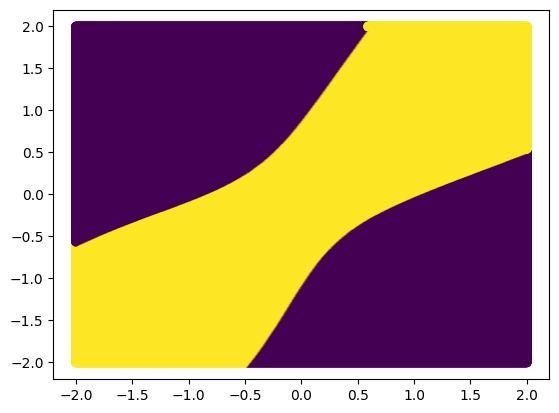

In [12]:
#plotando os resultados
import matplotlib.pyplot as plt
plt.scatter(X_eval[:, 0], X_eval[:, 1], c=Y_eval_mlp) # exibe pontos para coordenadas em X_Test definindo as cores a partir dos dados em Y_eval_mlp
plt.show() #exibe gráfico

E se criarmos um modelo usando função de ativação Relu?

In [13]:
#para isto, vamos reproduzir a mesma rede neural anterior
#mas mudando a função de ativação

model = Sequential() # carrega um modelo feed-forward

model.add(Dense(4, input_dim=2)) #cria uma camada densa com com 4 neuronios e 2 entradas
model.add(Activation('relu'))   #usando função de ativação relu

model.add(Dense(2))  #cria uma camada densa com com 2 neuronios (que recebe as saídas da camada anterior)
model.add(Activation('softmax'))   #usando função de ativação softmax para definir qual é a classe na saída

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) # define a rede neural

In [14]:
#vamos separar o conjunto de treinamento e de testes
#30% para testes, o restante para treinamento

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1000) # separa o conjunto de teste com 30% dos dados sorteados aleatóriamente com seed = 1000 
#outros 70% são definidos no conjunto de teste

#treinamento da rede neural 
#usando 100 épocas

#método fit executa o treinamento
model.fit(X_train,  #para o conjunto de teste "train" onde x_train sao os atributos
          to_categorical(Y_train, num_classes=2),  #e y_train sao as classes
          epochs=100,  #em 100 épocas
          batch_size=32, #de 32 em 32
          validation_data=(X_test, to_categorical(Y_test, num_classes=2))) # e demonstrando a acurácia de teste com

Epoch 1/100
22/22 [==============================] - 1s 10ms/step - loss: 0.5124 - accuracy: 0.6500 - val_loss: 0.5521 - val_accuracy: 0.5933
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.4997 - accuracy: 0.6771 - val_loss: 0.5418 - val_accuracy: 0.6100
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4885 - accuracy: 0.6957 - val_loss: 0.5315 - val_accuracy: 0.6200
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4778 - accuracy: 0.7086 - val_loss: 0.5218 - val_accuracy: 0.6333
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4679 - accuracy: 0.7129 - val_loss: 0.5120 - val_accuracy: 0.6467
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0.4579 - accuracy: 0.7286 - val_loss: 0.5024 - val_accuracy: 0.6567
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4481 - accuracy: 0.7443 - val_loss: 0.4928 - val_accuracy: 0.6600
Epoch 8/100


ValueError: 'c' argument has 1000000 elements, which is inconsistent with 'x' and 'y' with size 300.

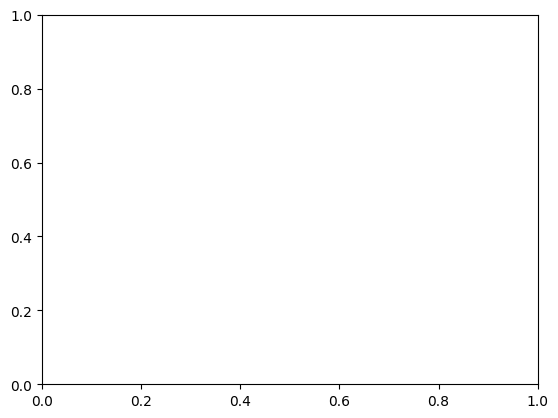

In [15]:
#plotando os resultados
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_eval_mlp) # exibe pontos para coordenadas em X_Test definindo as cores a partir dos dados em Y_eval_mlp
plt.show() #exibe gráfico

In [ ]:
#para verificarmos os limites entre os conjuntos de classificação
#vamos criar um conjunto com muitos pontos gerados aleatóriamente
#e usar o modelo para definir qual seria sua classe

import numpy as np

Xm = np.linspace(-2.0, 2.0, 1000) # cria 1000 pontos para a coordenada X
Ym = np.linspace(-2.0, 2.0, 1000) # cria 1000 pontos para a coordenada Y
Xmg, Ymg = np.meshgrid(Xm, Ym)  #retorna as coordenadas da grade 2-D com base nas coordenadas contidas nos vetores x e y
X_eval = np.vstack([Xmg.ravel(), Ymg.ravel()]).T #cria o conjunto de entradas para as coordenadas geradas

Y_eval_mlp = np.argmax(model.predict(X_eval), axis=1) # usa o modelo carregado em model para realizar a classificaç

In [ ]:
#plotando os resultados
import matplotlib.pyplot as plt
plt.scatter(X_eval[:, 0], X_eval[:, 1], c=Y_eval_mlp) # exibe pontos para coordenadas em X_Test definindo as cores a partir dos dados em Y_eval_mlp
plt.show() #exibe gráfico